# Classification

In [6]:
# Here are all imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Import & read data

In [8]:
df = pd.read_csv("iris.data", header=None)
df.columns = ['Sepal_length_cm', 'Sepal_width_cm', 'Petal_length_cm', 'Petal_width_cm', 'Species']
df.head()

,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print("Dataset shape: ",df.shape)

Dataset shape:  (150, 5)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal_length_cm  150 non-null    float64
 1   Sepal_width_cm   150 non-null    float64
 2   Petal_length_cm  150 non-null    float64
 3   Petal_width_cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No null values

In [12]:
# to display stats about data
df.describe()

,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory analysis

### Histograms

<Axes: >

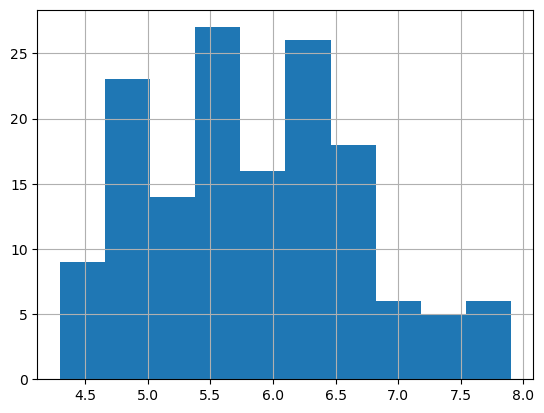

In [16]:
df['Sepal_length_cm'].hist()

<Axes: >

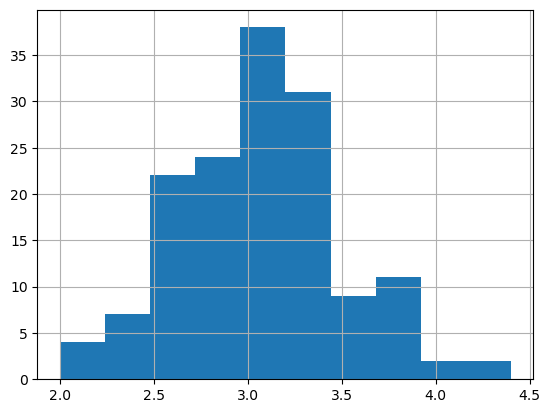

In [17]:
df['Sepal_width_cm'].hist()

<Axes: >

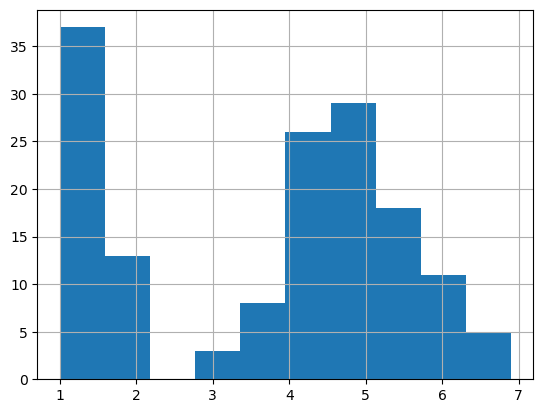

In [18]:
df['Petal_length_cm'].hist()

<Axes: >

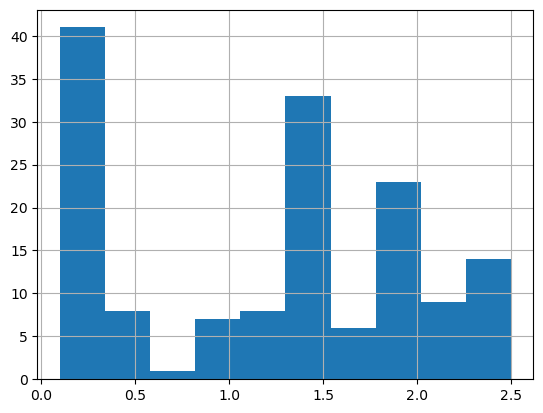

In [19]:
df['Petal_width_cm'].hist()

### Scatterplot

In [21]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

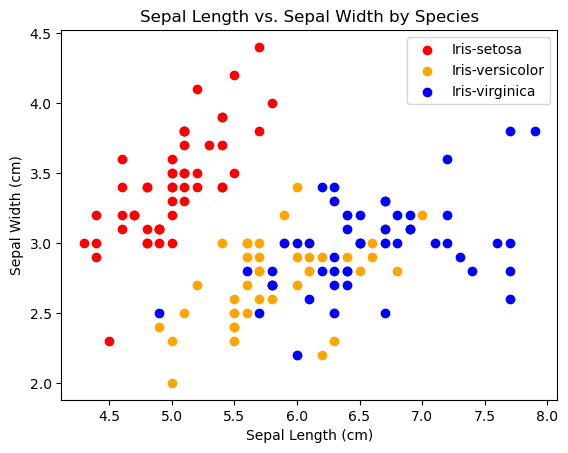

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal_length_cm'], x['Sepal_width_cm'], c = colors[i], label = species[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.legend()

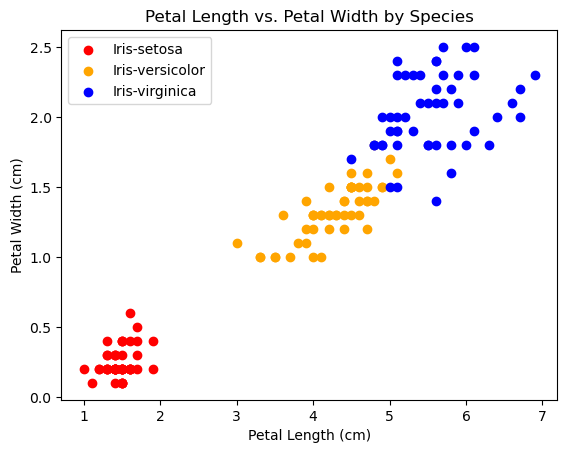

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal_length_cm'], x['Petal_width_cm'], c = colors[i], label = species[i])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width by Species')
plt.legend()

### Label encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# transform the string labels to integer
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model training & testing

### K-nearest neighbour classifer

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Separate features and target from dataframe
X = df.iloc[:, :-1].values  # All columns except the last one as features
y = df.iloc[:, -1].values   # The last column as target

In [30]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the KNN model with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compare predicted classes with actual classes to count correct predictions
correct_predictions = np.count_nonzero(y_pred == y_test)
incorrect_predictions = len(y_test) - correct_predictions

print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")

Accuracy: 1.00
Number of correct predictions: 45
Number of incorrect predictions: 0


In [31]:
# List of k values to test
k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]

In [32]:
# Initialize lists to store average accuracies and correct predictions
average_accuracies = []
average_correct_predictions = []

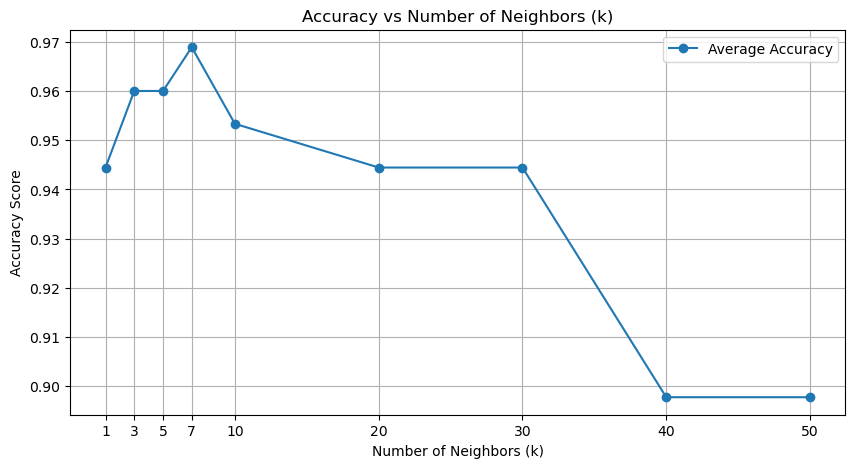

k=1: Average Correct Predictions = 42.50
k=3: Average Correct Predictions = 43.20
k=5: Average Correct Predictions = 43.20
k=7: Average Correct Predictions = 43.60
k=10: Average Correct Predictions = 42.90
k=20: Average Correct Predictions = 42.50
k=30: Average Correct Predictions = 42.50
k=40: Average Correct Predictions = 40.40
k=50: Average Correct Predictions = 40.40


In [33]:
# Loop through each value of k
for k in k_values:
    accuracies = []
    correct_predictions = []
    
    # Perform 10 random train/test splits
    for _ in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(1000))
        
        # Fit the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Generate predictions
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy and number of correct predictions
        acc = accuracy_score(y_test, y_pred)
        correct = np.count_nonzero(y_pred == y_test)
        
        # Store the results
        accuracies.append(acc)
        correct_predictions.append(correct)
    
    # Calculate the average accuracy and number of correct predictions for this k
    average_accuracies.append(np.mean(accuracies))
    average_correct_predictions.append(np.mean(correct_predictions))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, average_accuracies, marker='o', label='Average Accuracy')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Print the average number of correct predictions for each k
for i, k in enumerate(k_values):
    print(f"k={k}: Average Correct Predictions = {average_correct_predictions[i]:.2f}")

### Plot Analysis:

Small k Values (e.g., 1, 3, 5): Higher accuracy, but may lead to overfitting (model captures noise).
Larger k Values (e.g., 20, 30, 50): Lower accuracy, but better generalization (less sensitive to noise).
Optimal k: The plot shows a peak at k values 7 where the accuracy is highest before it starts to decrease.